## Rare Categories

- Labels 

- The number of labels in the dataset are different 

- __high cardinality__ refers to uniqueness of data values 

- The lower the cardinality, the more duplicated elements in a column

-  A column with the lowest possible cardinality would have the same value for every row

- Highly cardinal variables dominate tree based algorithms

- Labels may only be present in the training data set, but not in the test data set

- Labels may appear in the test set that were not present in the training set


__Tree methods are biased towards variables with many labels__


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [65]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv("gdrive/My Drive/Colab Notebooks/FeatureEngineering/train.csv")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [66]:
cat_cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

for i in cat_cols:
  print('Number of categories in the variable {}: {}'.format(i,len(data[i].unique())))

print('Total rows: {}'.format(len(data)))

Number of categories in the variable Name: 891
Number of categories in the variable Sex: 2
Number of categories in the variable Ticket: 681
Number of categories in the variable Cabin: 148
Number of categories in the variable Embarked: 4
Total rows: 891


In [67]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

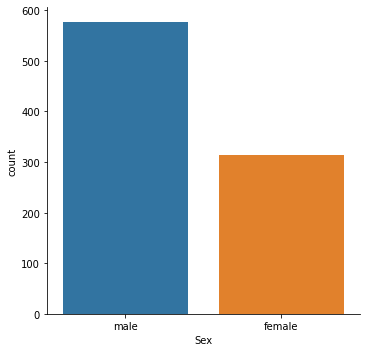

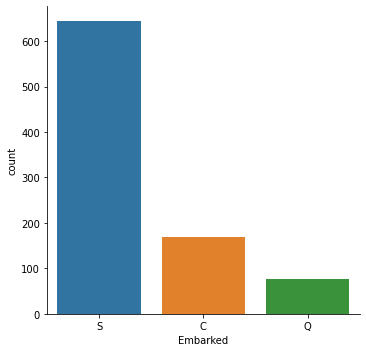

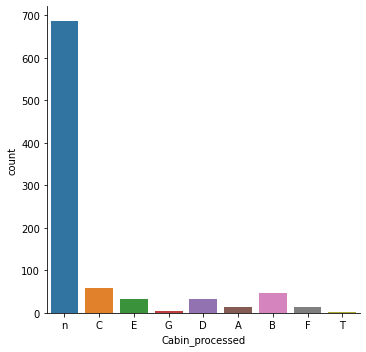

In [68]:
data['Cabin_processed'] = data['Cabin'].astype(str).str[0]
data['Cabin_processed_X'] = data['Cabin'].astype(str).str[1]
cat_cols = [ 'Sex', 'Embarked', 'Cabin_processed']

for i in cat_cols:
  sns.catplot(x=i, kind='count', data=data)

In [69]:
data['Cabin_processed'].value_counts() / len(data)

n    0.771044
C    0.066218
B    0.052750
D    0.037037
E    0.035915
A    0.016835
F    0.014590
G    0.004489
T    0.001122
Name: Cabin_processed, dtype: float64

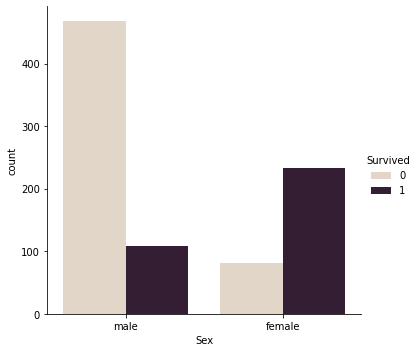

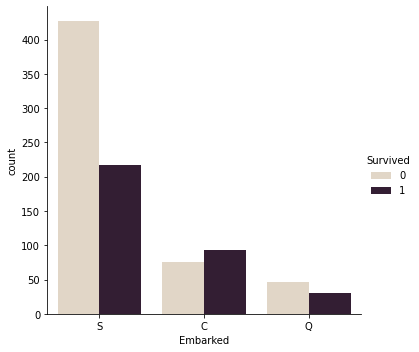

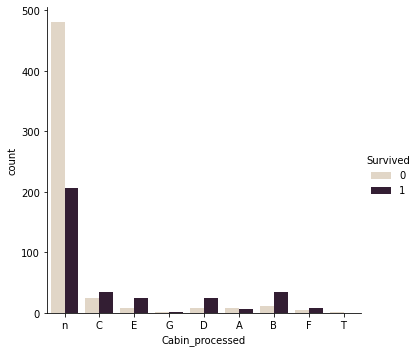

In [70]:
for i in cat_cols:
  sns.catplot(x=i,data=data, hue='Survived', kind='count', palette="ch:.25")


### Transform Rare Labels

In [71]:
_temp = pd.Series(data['Cabin_processed'].value_counts() / len(data))
_temp.sort_values(ascending=False)
_temp

n    0.771044
C    0.066218
B    0.052750
D    0.037037
E    0.035915
A    0.016835
F    0.014590
G    0.004489
T    0.001122
Name: Cabin_processed, dtype: float64

In [74]:
_temp = pd.Series(data['Cabin_processed'].value_counts() / len(data))
_temp

n    0.771044
C    0.066218
B    0.052750
D    0.037037
E    0.035915
A    0.016835
F    0.014590
G    0.004489
T    0.001122
Name: Cabin_processed, dtype: float64

In [0]:
for i in _labels:
  data['Cabin_processed'].replace(i, 'rare', inplace=True)

In [80]:
_temp = pd.Series(data['Cabin_processed'].value_counts() / len(data))
_temp

n       0.771044
C       0.066218
B       0.052750
D       0.037037
E       0.035915
A       0.016835
F       0.014590
rare    0.005612
Name: Cabin_processed, dtype: float64